# DIFFERENCE BETWEEN GS AND TEMPLATES

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json



comp = 2

with open(f'ENTHALPY/A{comp}B.json') as f:
    dict_temp = json.load(f)

with open('ENTHALPY/EntGs.json') as f:
    dict_gs = json.load(f)

ticks_labels = []

if comp == 1:
    diff = np.zeros(105)
    diff1 = np.zeros(105)
else:
    diff = np.zeros(210)
    diff1 = np.zeros(210)
    
gen_couples = [f'{temp.split('_')[0]}' for temp in dict_temp['MgO'].keys()]

for idx, pair in enumerate(dict_temp.keys()):
    ticks_labels.append(pair)
    times_in_gen = gen_couples.count(pair)
    singlediff = []
    singlediff1 = []
    for temp in dict_temp[pair].keys():
        singlediff.append(float(dict_temp[pair][temp])-float(dict_gs[f'{comp}'][pair]))
        if pair == temp.split('_')[0]:
            continue
        singlediff1.append(float(dict_temp[pair][temp])-float(dict_gs[f'{comp}'][pair]))

    singlediff = np.array(singlediff)
    diff[idx] = singlediff.min()
    singlediff1 = np.array(singlediff1)
    diff1[idx] = singlediff1.min()

fig, ax = plt.subplots(1,1, figsize=(20,8))
title = f'Enthalpy difference between ground state and lowest enthalpy template A{comp}B'
ax.set_title(title, fontsize=22, y=1.05)
ax.set_ylabel(r'$\Delta$H (eV/atom)', fontsize=22)
ax.axes.yaxis.set_label_coords(-0.06,0.5)
ax.set_xlabel('Element Pair', fontsize=22)
ax.axes.xaxis.set_label_coords(0.5,-0.1)
ax.set_xlim(0,len(diff)+1)

ax.set_yticks(np.arange(-0.6,0.7,0.1))
ax.set_yticklabels(np.round(np.arange(-0.6,0.7,0.1), decimals=1), fontsize=15)

ax.set_xticks(np.arange(1,len(diff)+1))
ax.set_xticklabels(ticks_labels, fontsize=10, rotation=90)
ax.grid(ls=':')

ax.bar(np.arange(1, len(diff) + 1), diff1, edgecolor='black', color='crimson', lw=1, label='Only considering other templates')
ax.bar(np.arange(1, len(diff) + 1), diff, edgecolor='black', color='green', lw=1, label='Also with their templates')
ax.legend(loc='upper right', fontsize=13)

fig.savefig(f'FIG/ENTDIFF_LWTEMP_GS_A{comp}B.png', bbox_inches="tight")

# TREND WITH ALL TEMPLATES


### ENERGY ERROR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

title = f'$\Delta$H w.r.t. USPEX GS with INITIAL SET'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')
max_x_ticks = np.array([])

complist = [1,2,3,4]
for comp in complist:
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T

    x = np.arange(1, len(tot[0])+1) 

    ax.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=6, label=f'A$_{comp}$B')
    max_x_ticks = np.append(max_x_ticks, len(tot[0]))


ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 0.05
y_ticks  = np.arange(0.0,0.5,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.2f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,0.4)

ax.set_xlabel('Size initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1, max(max_x_ticks)+1, 5)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_H.png', bbox_inches="tight")


### SIZE FINAL SET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

complist = [1, 2, 3, 4]

title = f'SIZE FINAL SET with threshold 0.9'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

max_x_ticks = np.array([])

for comp in complist:
    dir_name = f'{comp}'
    df_numtemp = pd.read_csv(mother_dir + f'{dir_name}/NumberTempRedu.csv', header=None, na_filter = False, index_col = 0)
    numtemp = (df_numtemp.to_numpy()).T
    x = np.arange(1, len(numtemp[0])+1)

    ax.plot(x, numtemp[0], marker = 'o', markeredgecolor='white', markersize=6, label=f'A$_{comp}$B')
    max_x_ticks = np.append(max_x_ticks, len(numtemp[0]))

ax.set_ylabel('Size final set', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 2
y_ticks  = np.arange(0,30,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=0)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.0f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,30)

ax.set_xlabel('Size initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1, max(max_x_ticks)+1, 5)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

ax.grid(True, ls=':')
ax.legend(loc='lower right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_Ntemp.png', bbox_inches="tight")


### STD ENERGY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

title = f'$\Delta$H w.r.t. USPEX GS with INITIAL SET'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')
max_x_ticks = np.array([])

complist = [1,2,3,4]
for comp in complist:
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T

    x = np.arange(1, len(tot[1])+1) 

    ax.plot(x, tot[1] , marker = 'o', markeredgecolor='white', markersize=6, label=f'A$_{comp}$B')
    max_x_ticks = np.append(max_x_ticks, len(tot[1]))


ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

step = 0.005
y_ticks  = np.arange(0.0,0.1,step, dtype=float)
y_ticks = np.round(y_ticks, decimals=2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{i:.3f}' for i in y_ticks], fontsize=18)
ax.set_ylim(0,0.1)

ax.set_xlabel('Size initial set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

xticks = np.arange(1, max(max_x_ticks)+1, 5)
xticks = np.round(xticks, decimals=0) 
ax.set_xticks(xticks)
ax.set_xlim(0,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

ax.grid(True, ls=':')
ax.legend(loc='upper right', fontsize=15)

plt.show()
fig.savefig('FIG/INIT_std.png', bbox_inches="tight")


### COMPARISON INIT vs FINAL

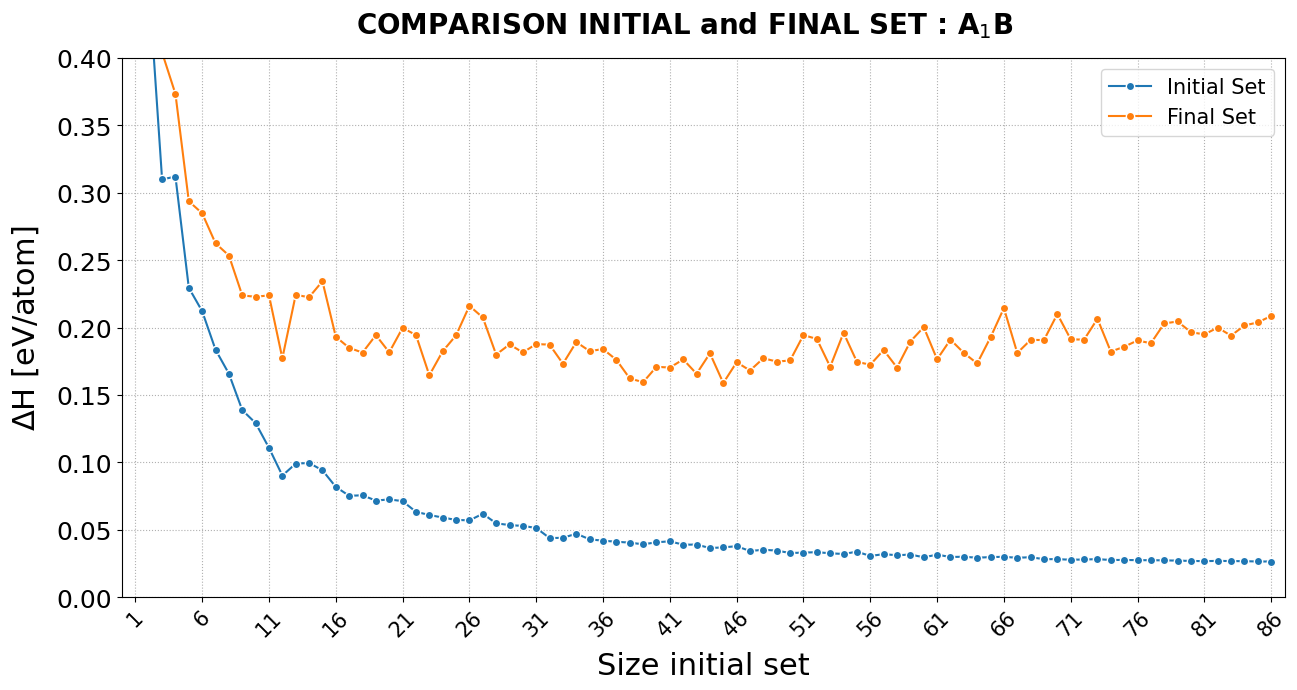

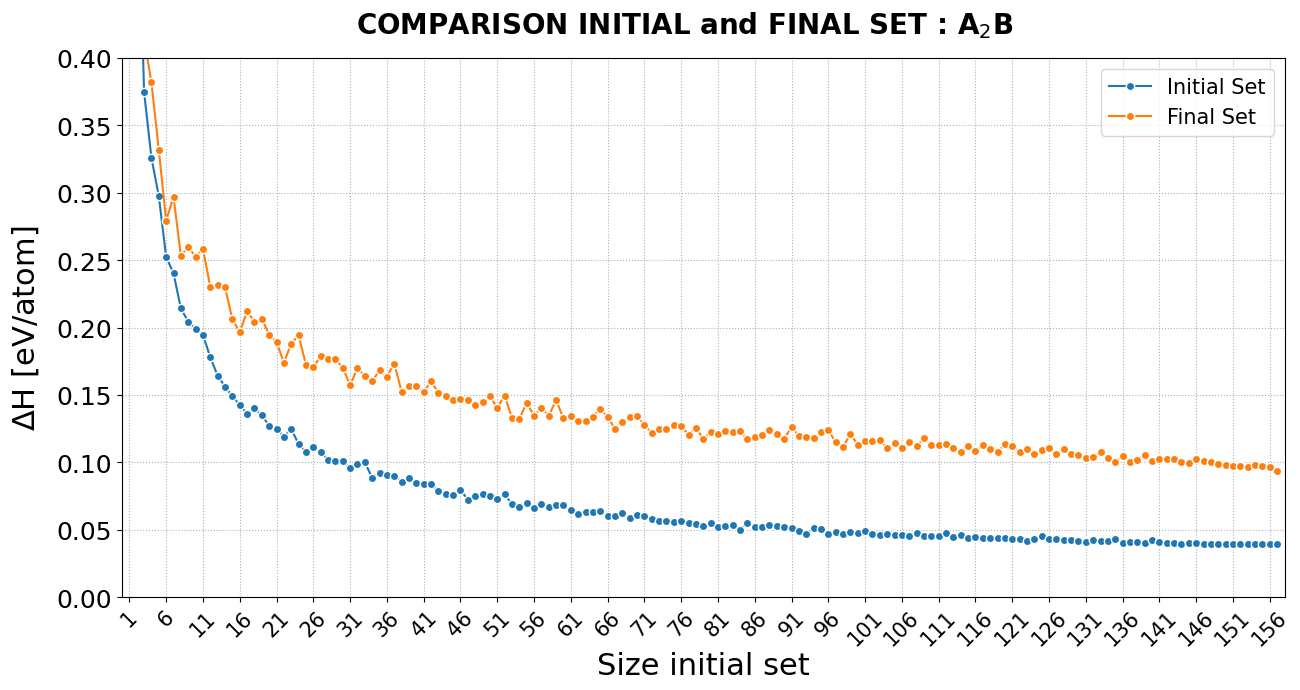

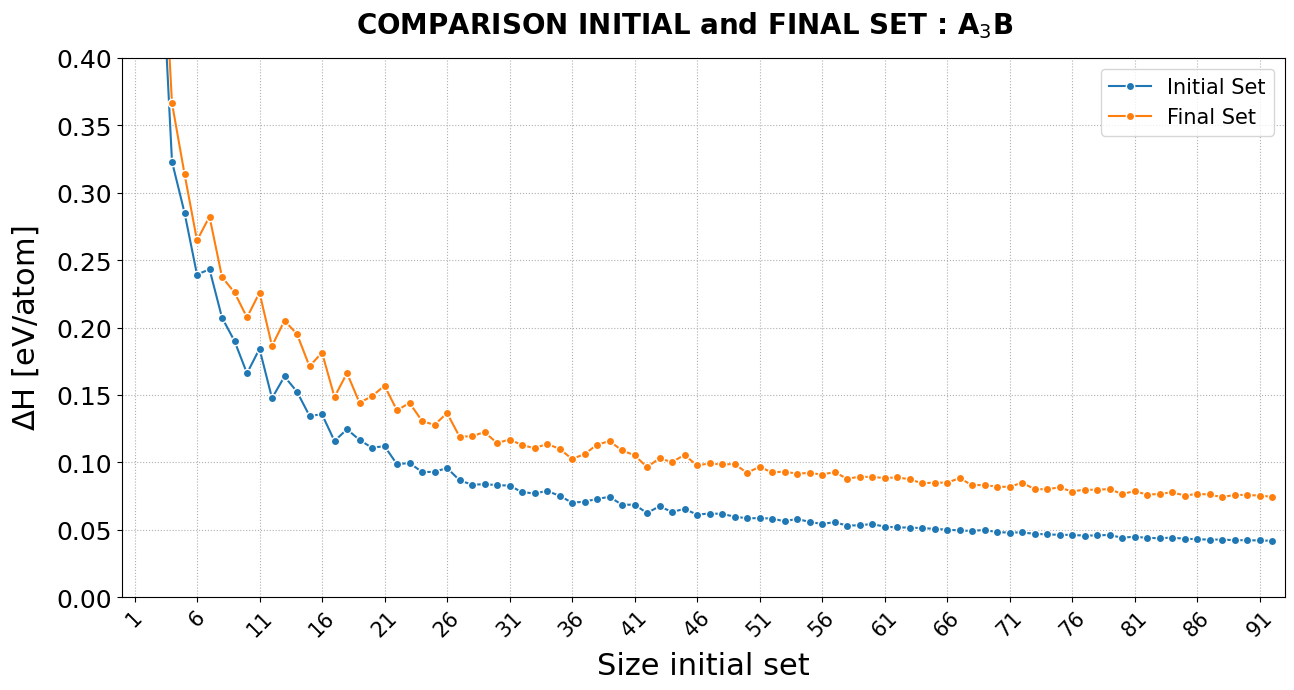

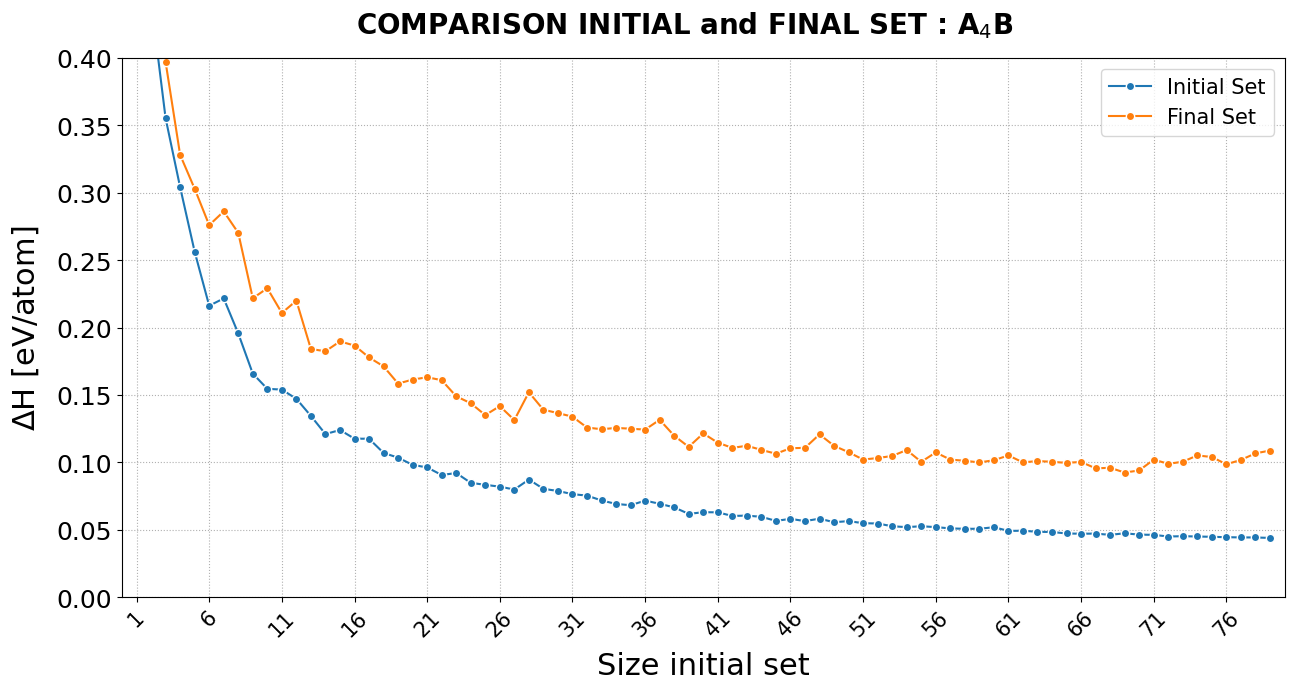

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './HvsINIT/'

complist = [1,2,3,4]
for comp in complist:

    title = f'COMPARISON INITIAL and FINAL SET : A$_{comp}$B'
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    fig.subplots_adjust(hspace=0.0)
    fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T
    df_tot_fin = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
    tot_fin = (df_tot_fin.to_numpy()).T

    x = np.arange(1, len(tot[0])+1) 

    ax.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=6, label=f'Initial Set')
    ax.plot(x, tot_fin[0] , marker = 'o', markeredgecolor='white', markersize=6, label=f'Final Set')


    ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22)
    ax.yaxis.set_label_coords(-0.07, 0.5)

    step = 0.05
    y_ticks  = np.arange(0.0,0.5,step, dtype=float)
    y_ticks = np.round(y_ticks, decimals=2)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{i:.2f}' for i in y_ticks], fontsize=18)
    ax.set_ylim(0,0.4)

    ax.set_xlabel('Size initial set', fontsize=22)
    ax.xaxis.set_label_coords(0.5, -0.10)

    xticks = np.arange(1, len(tot[0])+1, 5)
    xticks = np.round(xticks, decimals=0) 
    ax.set_xticks(xticks)
    ax.set_xlim(0,len(tot[0])+1)
    ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

    ax.grid(True, ls=':')
    ax.legend(loc='upper right', fontsize=15)

    plt.show()
    fig.savefig(f'FIG/IvsF_A{comp}B.png', bbox_inches="tight")


# TREND WITH SIZE INITIAL SET = 25

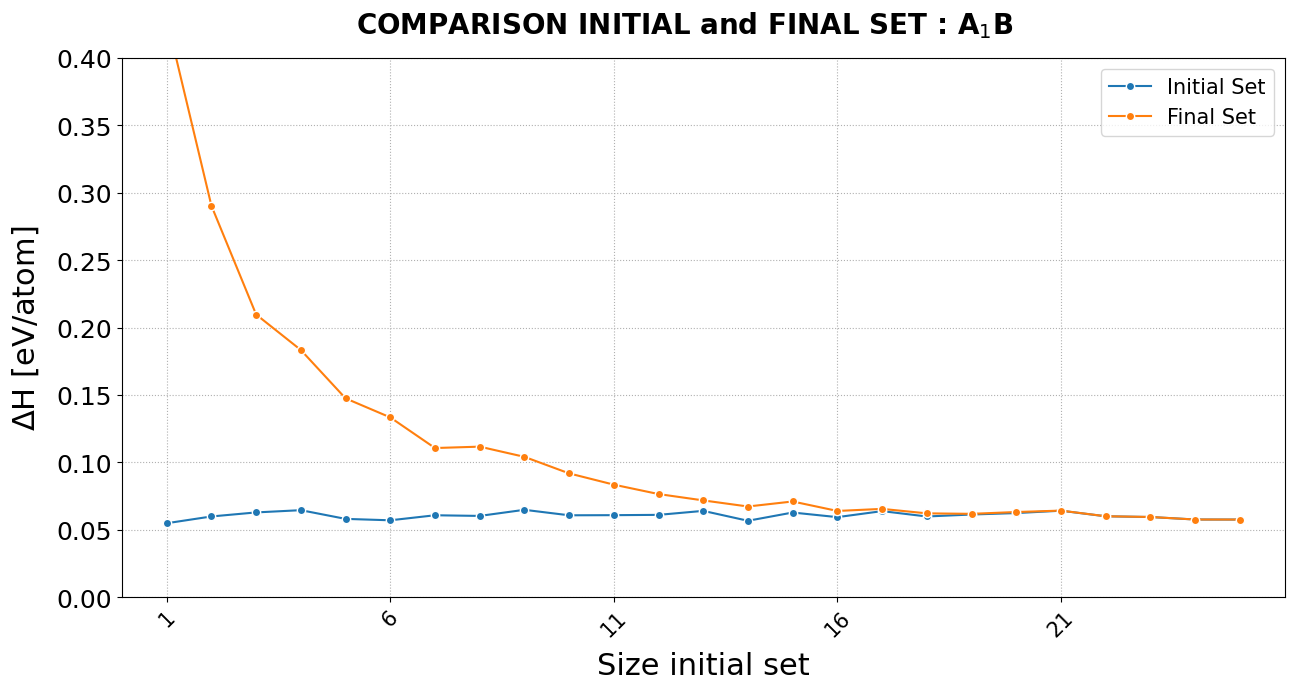

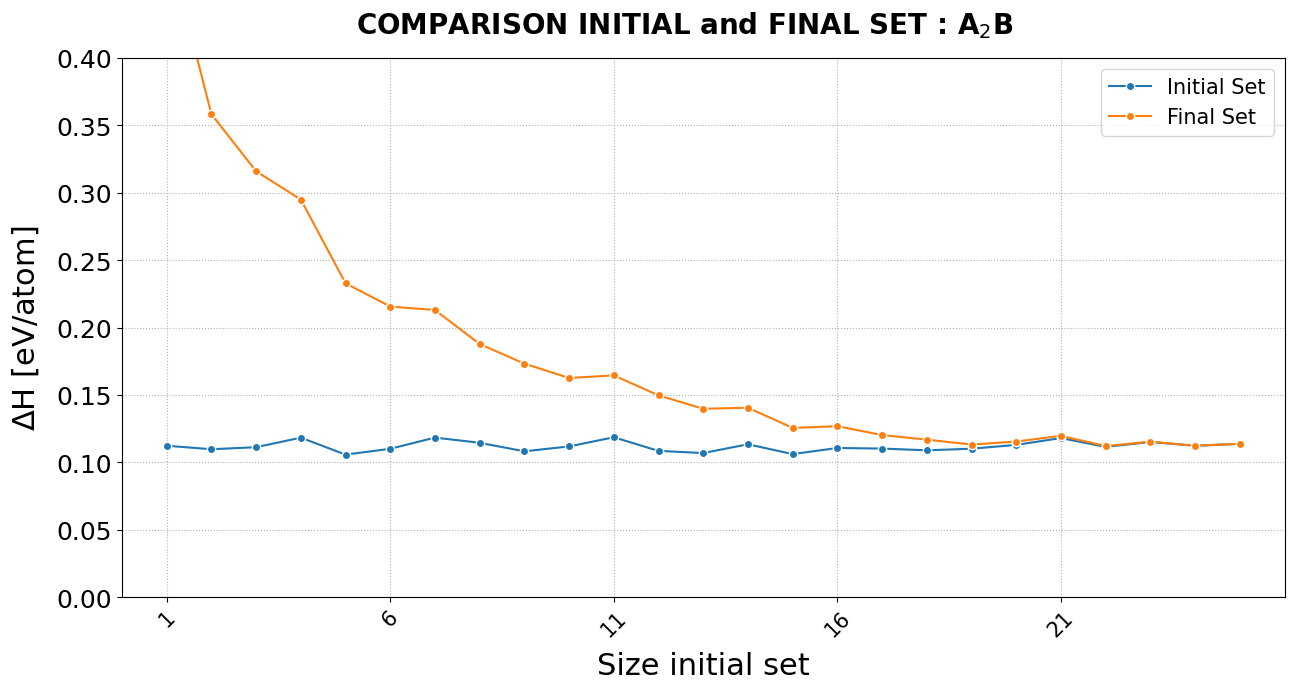

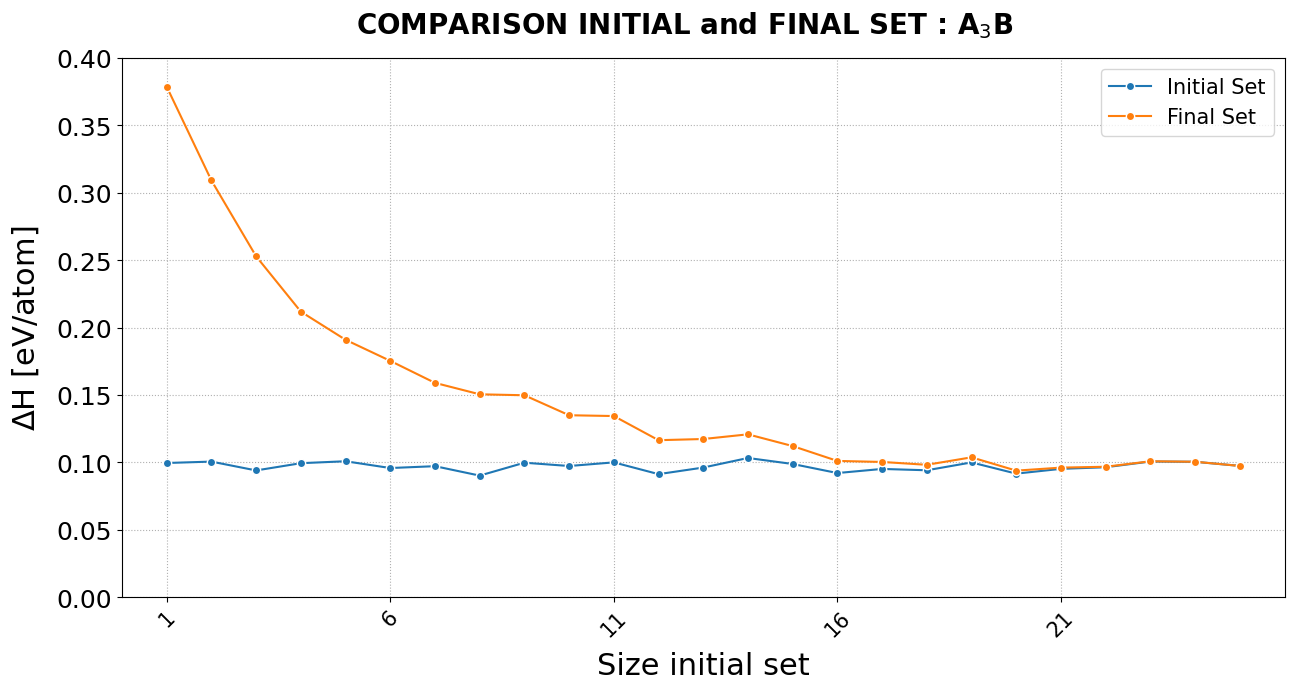

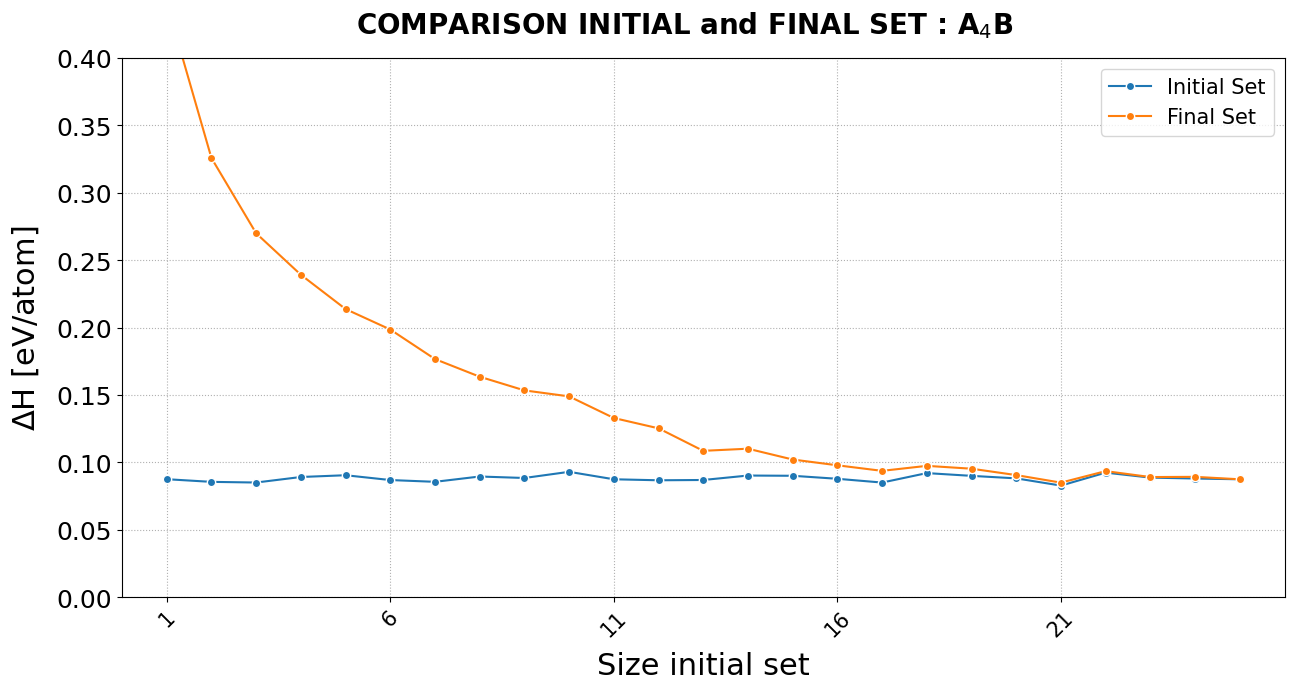

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mother_dir = './VARIOUS_FINAL/'

complist = [1,2,3,4]
for comp in complist:

    title = f'COMPARISON INITIAL and FINAL SET : A$_{comp}$B'
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    fig.subplots_adjust(hspace=0.0)
    fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')

    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T
    df_tot_fin = pd.read_csv(mother_dir + f'{dir_name}/TotalStatics.csv', header=None, na_filter=False, index_col = 0)
    tot_fin = (df_tot_fin.to_numpy()).T

    x = np.arange(1, len(tot[0])+1) 

    ax.plot(x, tot[0] , marker = 'o', markeredgecolor='white', markersize=6, label=f'Initial Set')
    ax.plot(x, tot_fin[0] , marker = 'o', markeredgecolor='white', markersize=6, label=f'Final Set')


    ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22)
    ax.yaxis.set_label_coords(-0.07, 0.5)

    step = 0.05
    y_ticks  = np.arange(0.0,0.5,step, dtype=float)
    y_ticks = np.round(y_ticks, decimals=2)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{i:.2f}' for i in y_ticks], fontsize=18)
    ax.set_ylim(0,0.4)

    ax.set_xlabel('Size initial set', fontsize=22)
    ax.xaxis.set_label_coords(0.5, -0.10)

    xticks = np.arange(1, len(tot[0])+1, 5)
    xticks = np.round(xticks, decimals=0) 
    ax.set_xticks(xticks)
    ax.set_xlim(0,len(tot[0])+1)
    ax.set_xticklabels([f'{i:.0f}' for i in xticks], fontsize=15, rotation=45)

    ax.grid(True, ls=':')
    ax.legend(loc='upper right', fontsize=15)

    plt.show()
    fig.savefig(f'FIG/SIZEFINAL_A{comp}B.png', bbox_inches="tight")


# MEAN ERR vs NTEMP FINAL

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from template_csp import managetemp as mte
from tqdm import tqdm
import json

# test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

# hyperparameters = { 
#     "weight_occurrence" : 1,
#     "weight_sg" : 0.001,
#     "weight_formation_entalphy" : 1, 
#     "lev_red" : 0.9
# }

# mother_dir = './FULL20sets/'
# n_sets = 20

# errors = {}
# for i in tqdm(os.listdir(mother_dir)):
#     if i.endswith('.csv') or i.endswith('.json'):
#         continue
#     for j in range(n_sets):

#         template_set = mte.TemplateSet(test_elements, mother_dir + i + f'/TemplateSet_{j}')
#         reduction_set = mte.PairSet(template_set, test_elements, mother_dir + i + f'/PairSet_{j}')
#         n_finale_temp = len(reduction_set.reduced_set(hyperparameters))
#         error = reduction_set.total_error(hyperparameters)

#         if f'{n_finale_temp}' in errors.keys():
#             errors[f'{n_finale_temp}'].append(error)
#         else:
#             errors[f'{n_finale_temp}'] = [error]

# with open('FULL/NTempFin_Err.json', 'w') as f:
#     json.dump(errors, f)

import json
with open('FULL20sets/NTempFin_Err.json', 'r') as f:
    errors = json.load(f)
    
n_temp = np.zeros(len(errors.keys()))
stds = np.zeros(len(errors.keys()))
en = np.zeros(len(errors.keys()))

for idx, i in enumerate(errors.keys()):
    n_temp[idx] = int(i)
    en[idx] = np.mean(np.array(errors[i]))
    stds[idx] = np.std(np.array(errors[i]))


title = f'Threshold for Reduction = 0.9 and Comparative Pairs = 105'
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
fig.subplots_adjust(hspace=0.0)
fig.suptitle(title, fontsize=22, y=0.95)

sorted_idx = np.argsort(n_temp)
n_temp = n_temp[sorted_idx]
en = en[sorted_idx]
stds = stds[sorted_idx]

ax.errorbar(n_temp, en, yerr=stds, color = 'blue', ecolor='red', elinewidth=1, capsize=2, marker = 'o',markersize = 10,  markeredgecolor='white')

n_temp = n_temp.astype(int)
ax.set_xticks(n_temp)
ax.set_xticklabels(n_temp, fontsize=18)
ax.set_xlabel('Size final set', fontsize=22)
ax.xaxis.set_label_coords(0.5, -0.10)

yticks = np.arange(0, 1.8, 0.2)
ax.set_ylim(0, 1.8)
yticks = np.round(yticks, decimals=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)
ax.set_ylabel(r'$\Delta$H w.r.t. GS [eV/atom]', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)

ax.grid(True, ls=':')
fig.savefig('NTempFin_Err.png', bbox_inches="tight")


# OCCURRENCE, FORMATION ENT, LEV DIST

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULL5sets/20/PairSet_0')
lev_dist = pair_set.dist_matrix()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,14), width_ratios=[11, 12.2])
title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
im = ax.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_yticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
lev_dist = np.delete(lev_dist, idx_to_remove, axis=0)
lev_dist = np.delete(lev_dist, idx_to_remove, axis=1)
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
im = ax1.imshow(lev_dist, cmap='plasma')
im.set_clim(0.7, 1)
cbar = fig.colorbar(im, ax=ax1, orientation='vertical', fraction=0.046, pad=0.05, ticks = np.arange(0, 1.1, 0.1)) 
ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_yticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.set_yticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15)
plt.show()
fig.savefig('LevDistMat.png', bbox_inches="tight")

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './RANDOM/FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './RANDOM/FULL5sets/20/PairSet_0')
formation_enthalpy = pair_set.formation_percentage()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
ax.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy > 0')
ax.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy < 0')

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.legend(fontsize=15)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('% of all compounds', fontsize=22)
ax.yaxis.set_label_coords(-0.10, 0.5)
yticks = np.arange(0,1.1,0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{int(i*100)}%' for i in yticks], fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
formation_enthalpy = np.delete(formation_enthalpy, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
ax1.bar(np.arange(len(template_set.couples)), np.zeros(len(template_set.couples))+1, color='grey', edgecolor='black', label='Formation Enthalpy < 0')
ax1.bar(np.arange(len(template_set.couples)), formation_enthalpy, color='lightgreen', edgecolor='black', label='Formation Enthalpy > 0')

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.legend(fontsize=15)
ax1.grid(True, ls=':', axis='y', color='black')


fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('FormationEnt.png', bbox_inches="tight")

In [ ]:
from template_csp import managetemp as mte
import os
import numpy as np
import matplotlib.pyplot as plt

test_elements=['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']
hyperparameters = {
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "lev_red" : 0.9
}
template_set = mte.TemplateSet(test_elements, './FULL5sets/20/TemplateSet_0')
pair_set = mte.PairSet(template_set, test_elements, './FULL5sets/20/PairSet_0')
isto = pair_set.template_gs()

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(20,6), sharey=True)

title = f'Initial Set'
ax.set_title(title, fontsize=22, y=1.02)
ax.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax.set_xticks(np.arange(len(template_set.couples)))
ax.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax.grid(True, ls=':', axis='y', color='black')

ax.set_ylabel('Lowest Energy template', fontsize=22)
ax.yaxis.set_label_coords(-0.07, 0.5)
yticks = np.arange(0,25,2)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)

reduction_set = pair_set.reduced_set(hyperparameters)
idx_to_remove = [i for i in range(len(template_set.couples)) if i not in reduction_set]
template_set.couples = [template_set.couples[i] for i in range(len(template_set.couples)) if i in reduction_set]
isto = np.delete(isto, idx_to_remove)

title = f'Final Set'
ax1.set_title(title, fontsize=22, y=1.02)
ax1.bar(np.arange(len(template_set.couples)), isto, color='crimson', edgecolor='black', alpha=0.8)

ax1.set_xticks(np.arange(len(template_set.couples)))
ax1.set_xticklabels([f'{i[0][0]}{i[0][1]} {i[1]}' for i in template_set.couples], fontsize=15, rotation=90)
ax1.grid(True, ls=':', axis='y', color='black')

fig.subplots_adjust(wspace=0.01)
plt.show()
fig.savefig('Occurrence.png', bbox_inches="tight")